## Section I

### Download Data

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 17KnUeG8_I9vgGU5mqym2hfFjnJPSEH-X

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=17KnUeG8_I9vgGU5mqym2hfFjnJPSEH-X
To: /content/CarPrice_Assignment.csv
100% 26.7k/26.7k [00:00<00:00, 12.9MB/s]


In [ ]:
# from google.colab import files
# uploaded = files.upload()

### Read .csv & Call .info

In [ ]:
import pandas as pd
df = pd.read_csv("/content/CarPrice_Assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Section II

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
for i in df.columns:
  print('Number of NaN in',i,'=',df.isna().sum().sum())

Number of NaN in car_ID = 0
Number of NaN in symboling = 0
Number of NaN in CarName = 0
Number of NaN in fueltype = 0
Number of NaN in aspiration = 0
Number of NaN in doornumber = 0
Number of NaN in carbody = 0
Number of NaN in drivewheel = 0
Number of NaN in enginelocation = 0
Number of NaN in wheelbase = 0
Number of NaN in carlength = 0
Number of NaN in carwidth = 0
Number of NaN in carheight = 0
Number of NaN in curbweight = 0
Number of NaN in enginetype = 0
Number of NaN in cylindernumber = 0
Number of NaN in enginesize = 0
Number of NaN in fuelsystem = 0
Number of NaN in boreratio = 0
Number of NaN in stroke = 0
Number of NaN in compressionratio = 0
Number of NaN in horsepower = 0
Number of NaN in peakrpm = 0
Number of NaN in citympg = 0
Number of NaN in highwaympg = 0
Number of NaN in price = 0


## Section II

In [ ]:
import pandas as pd
import difflib

# list of valid car company names
valid_names = ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'vw', 'volvo']

# read the original csv file into a pandas dataframe
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# extract the first word of each CarName into a new CompanyName column
df['CompanyName'] = df['CarName'].str.split().str[0]

# replace any invalid names with the nearest match from the list
df['CompanyName'] = df['CompanyName'].apply(lambda x: difflib.get_close_matches(x, valid_names, n=1)[0])

# Place CompanyName column at first position
# # reorder the columns so that CompanyName is the first column
# df = df[['CompanyName', *df.columns[:-4]]]
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# drop the CarName, car_ID, and symbolling columns
df = df.drop(['CarName', 'car_ID', 'symboling'], axis=1)

# save the modified dataframe to a new csv file
df.to_csv('CarPrice_Assignment1.csv', index=False)


## Section III

### Type1: Numeric (1,2,...)

In [ ]:
import pandas as pd

# read the csv file
df = pd.read_csv('/content/CarPrice_Assignment1.csv')

# iterate over each column in the dataframe
for col in df.columns:
    # check if the column has a non-numeric data type
    if df[col].dtype == 'object':
        # use the pandas factorize() method to encode the values as integers
        df[col] = pd.factorize(df[col])[0]

# save the updated dataframe to a new csv file
df.to_csv('CarPrice_Assignment2.csv', index=False)

In [ ]:
import pandas as pd

# load the csv file
df = pd.read_csv('/content/CarPrice_Assignment2.csv')

# normalize each column by its own maximum value
normalized_df = df.apply(lambda x: x / x.max(), axis=0)

# save the normalized dataframe to a new csv file
normalized_df.to_csv('CarPrice_Assignment3.csv', index=False)

### Type1: One-hot (Multi-Column)

In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv('/content/CarPrice_Assignment1.csv')

# Loop through each column in the dataframe
for col in df.columns:
    # Check if the column contains non-numeric values (i.e. objects)
    if df[col].dtype == 'object':
        # Convert non-numeric values to one-hot encoded columns
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        # Drop the original column
        df.drop(columns=[col], inplace=True)

# Save result to a new CSV file
df.to_csv('CarPrice_Assignment4.csv', index=False)

### Type1: One-hot (Single-Column)

In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv('/content/CarPrice_Assignment3.csv')

# Group columns by the characters before the first underscore in their headers
groups = {}
for col in df.columns:
    prefix = col.split('_')[0]
    if prefix not in groups:
        groups[prefix] = []
    groups[prefix].append(col)

# Merge columns within each group and remove original columns
for prefix, cols in groups.items():
    if len(cols) > 1:
        new_col = '_'.join([prefix] + [''.join(c.split(prefix+'_')[1:]) for c in cols])
        df[new_col] = df[cols].apply(lambda x: ' '.join(x.astype(str)), axis=1)
        df.drop(columns=cols, inplace=True)

# Save result to a new CSV file
df.to_csv('CarPrice_Assignment5.csv', index=False)

## Section IV

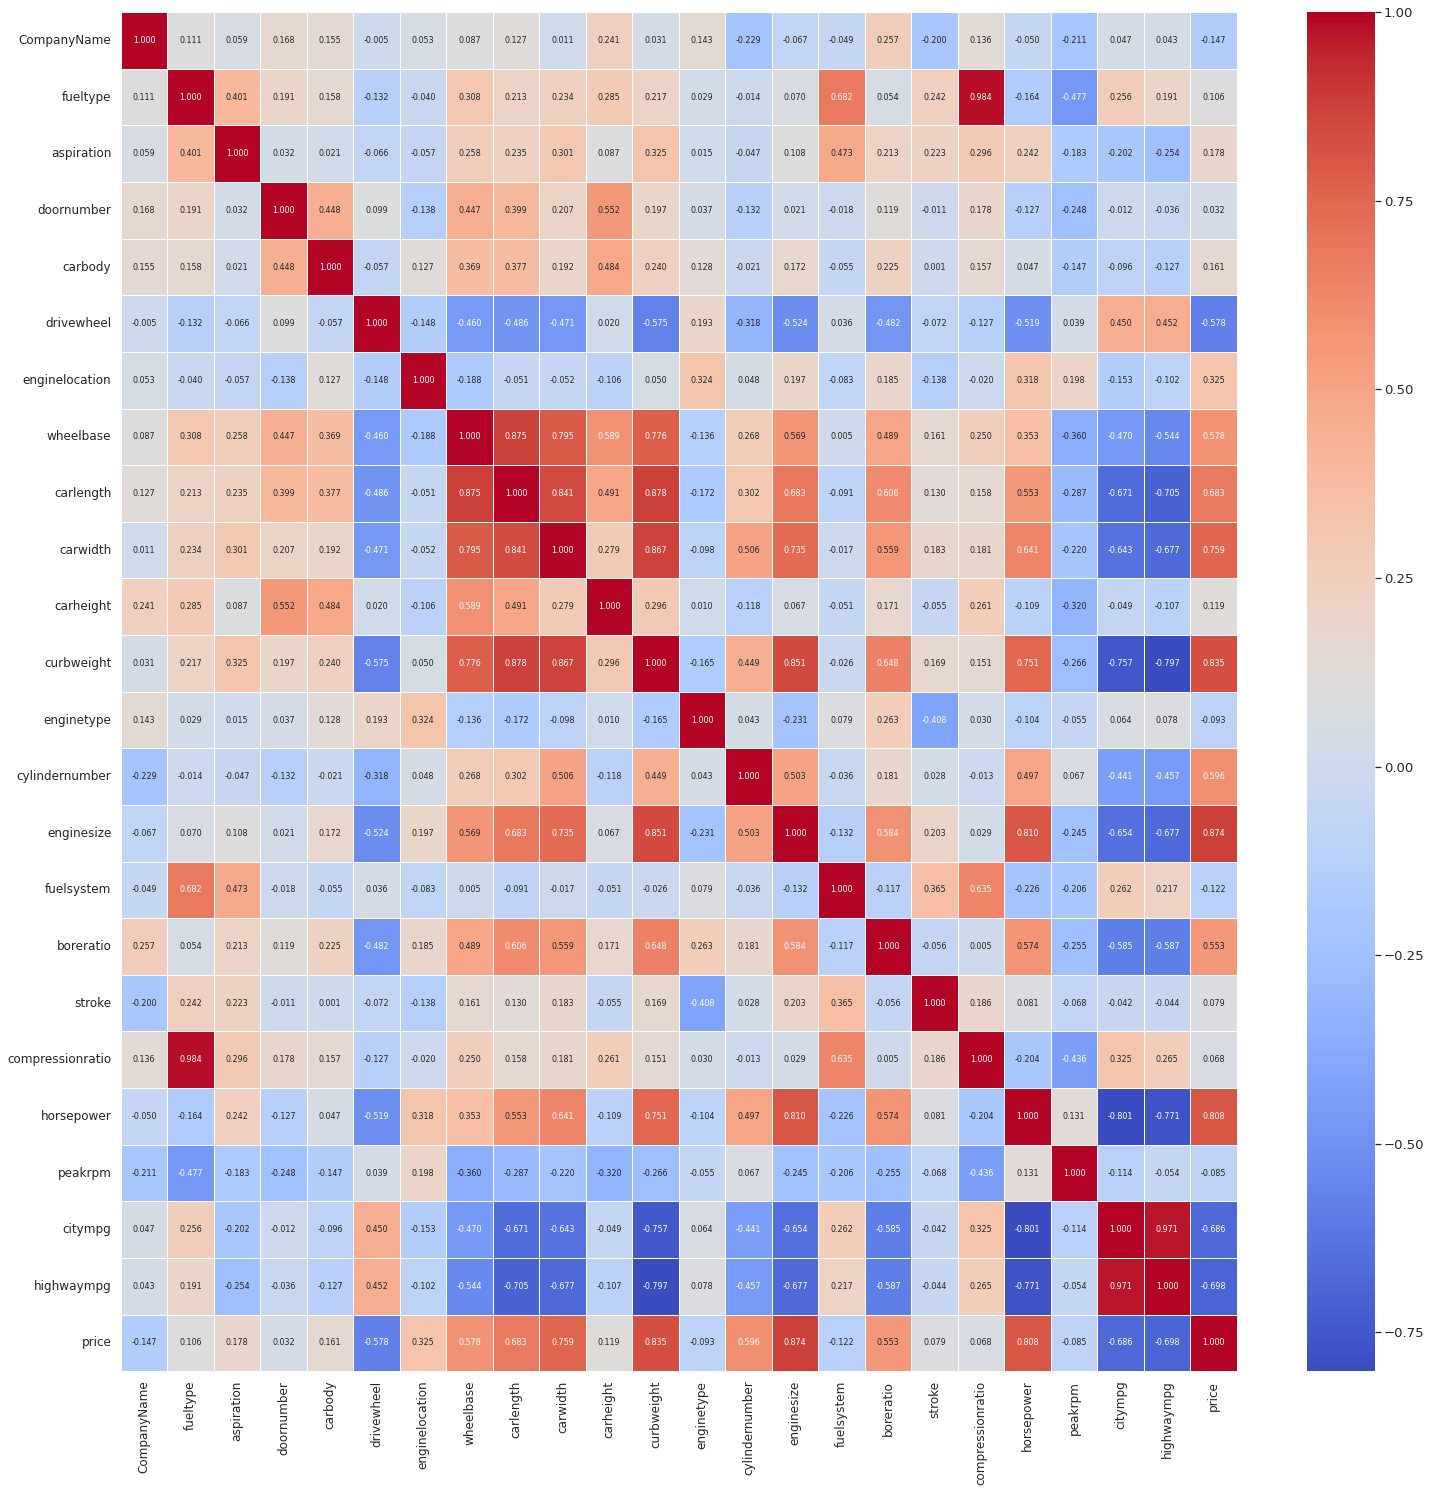

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/CarPrice_Assignment2.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')

<ipython-input-21-a8dad790cfb8>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


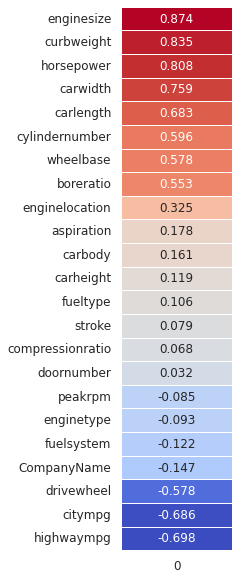

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/CarPrice_Assignment2.csv')

# Select columns to include in correlation matrix
cols = df.columns.tolist()
cols.remove('price')

# Calculate correlation matrix
corr_matrix = df[cols].corrwith(df['price']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2,10))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt='.3f', cbar=False)

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.tight_layout()
plt.savefig('priceCM1.pdf', bbox_inches='tight')

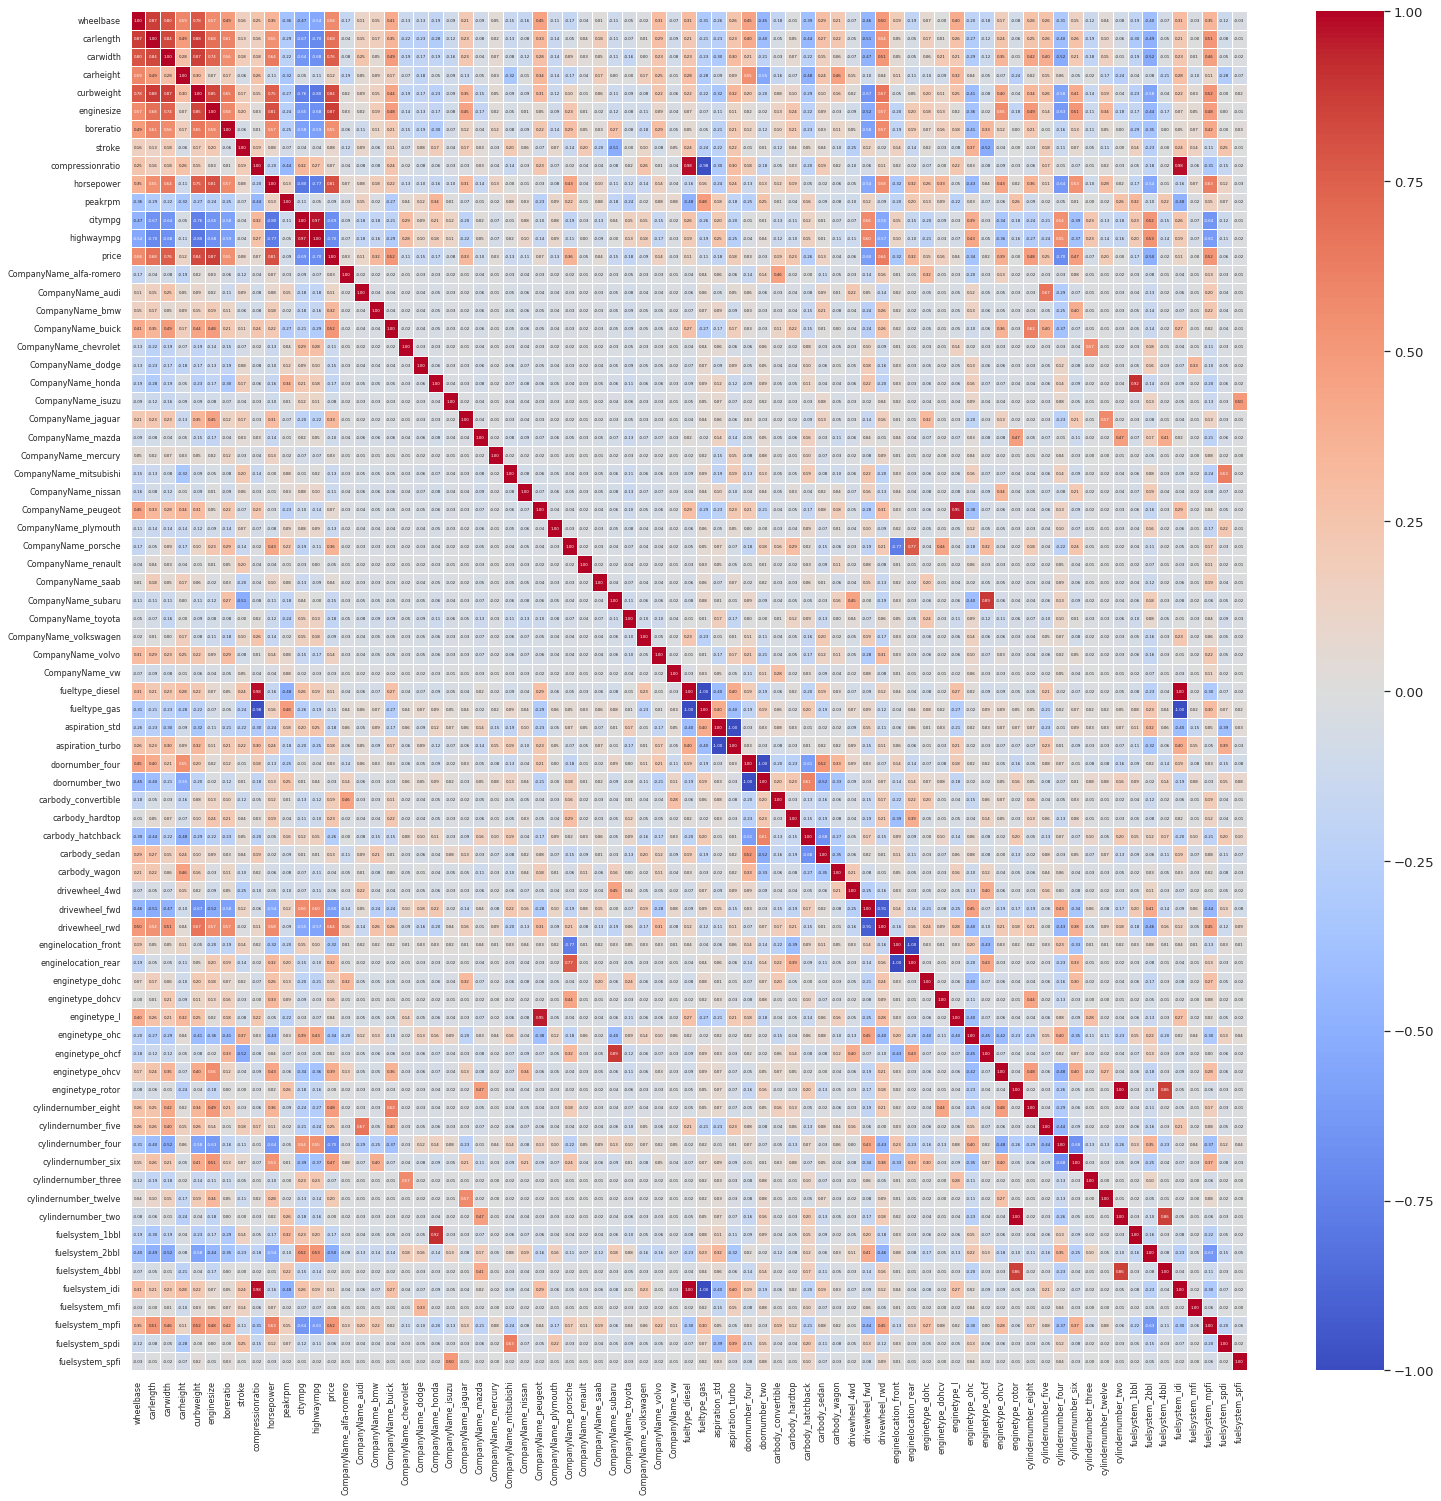

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 4}, fmt='.2f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=8)
plt.yticks(fontsize=8, rotation=0)

# Adjust margins of PDF file
plt.savefig('PIcS2.pdf', bbox_inches='tight')

<ipython-input-22-e336a035d99a>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


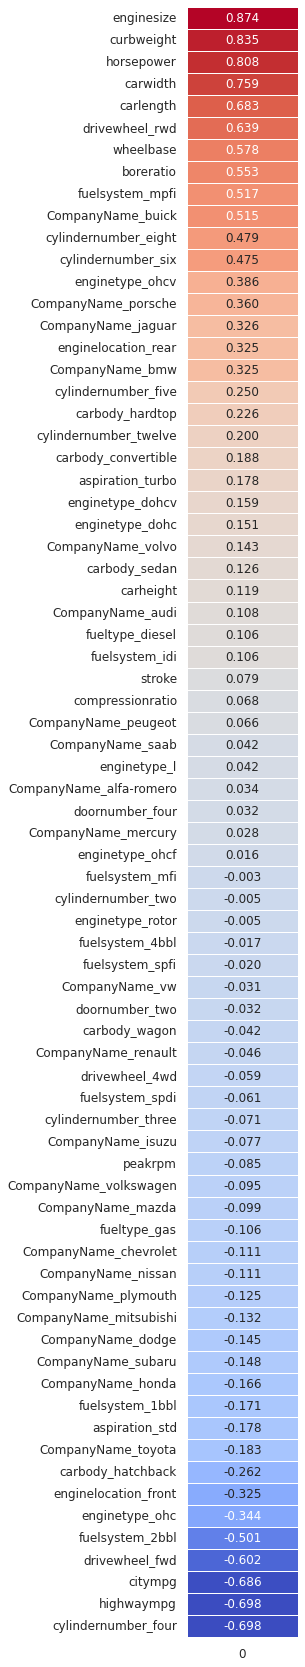

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Select columns to include in correlation matrix
cols = df.columns.tolist()
cols.remove('price')

# Calculate correlation matrix
corr_matrix = df[cols].corrwith(df['price']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2,30))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt='.3f', cbar=False)

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.tight_layout()
plt.savefig('priceCM2.pdf', bbox_inches='tight')

### Other Codes

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment2.csv')

# Generate the correlation matrix
CM = df.corr()

# Create a styled correlation matrix with a coolwarm color map
styled_CM = CM.style.background_gradient(cmap='coolwarm')
CM.style.background_gradient(cmap='coolwarm')

In [ ]:
CM_Sort= CM.sort_values(by='price', ascending=False)
CM_Sort.style.background_gradient(cmap='coolwarm').format(precision=3)

In [ ]:
CM_Sort.iloc[:,23:24].style.background_gradient(cmap='coolwarm').format(precision=3)

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Generate the correlation matrix
CM = df.corr()

# Create a styled correlation matrix with a coolwarm color map
styled_CM = CM.style.background_gradient(cmap='coolwarm')
CM.style.background_gradient(cmap='coolwarm')

In [ ]:
CM_Sort= CM.sort_values(by='price', ascending=False)
CM_Sort.style.background_gradient(cmap='coolwarm').format(precision=3)

In [ ]:
CM_Sort.iloc[:,13:14].style.background_gradient(cmap='coolwarm').format(precision=3)

In [ ]:
corr_matrix = df.corr()
print(corr_matrix.iloc[1])
j=-1
for  i in range(len(corr_matrix.iloc[13])):
  if (corr_matrix.iloc[13][i] == 1):
    continue
  else:
    if (j < corr_matrix.iloc[13][i] ):
      j = corr_matrix.iloc[13][i]
      ii=i

print ('Maximum Correlation Matrix','is', df.columns[ii],'and the value','=',j)

wheelbase          0.874587
carlength          1.000000
carwidth           0.841118
carheight          0.491029
curbweight         0.877728
                     ...   
fuelsystem_idi     0.212679
fuelsystem_mfi    -0.004831
fuelsystem_mpfi    0.511374
fuelsystem_spdi   -0.079790
fuelsystem_spfi   -0.008245
Name: carlength, Length: 75, dtype: float64
Maximum Correlation Matrix is enginesize and the value = 0.8741448025245117


## Section VI

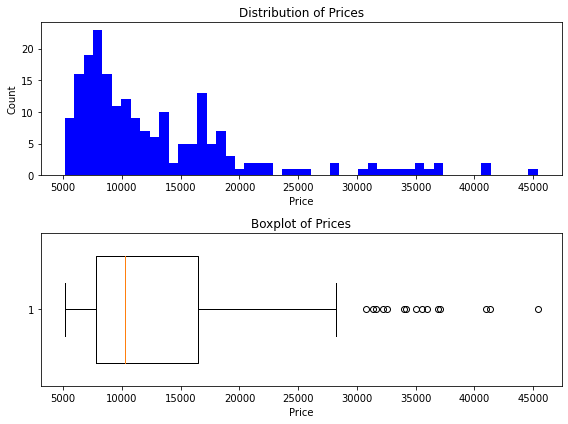

(0, 8000]           61
(8000, 16000]       89
(16000, 24000]      36
(24000, 32000]       7
(32000, 40000]       9
(40000, 48000]       3
(48000, 56000]       0
(56000, 64000]       0
(64000, 72000]       0
(72000, 80000]       0
(80000, 88000]       0
(88000, 96000]       0
(96000, 104000]      0
(104000, 112000]     0
(112000, 120000]     0
(120000, 128000]     0
(128000, 136000]     0
(136000, 144000]     0
(144000, 152000]     0
Name: price, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/CarPrice_Assignment2.csv')

# Plot the distribution of the 'price' column as a histogram
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.subplot(2, 1, 1)  # Create the first subplot
plt.hist(df['price'], bins=50, color='blue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')

# Plot a boxplot of the 'price' column
plt.subplot(2, 1, 2)  # Create the second subplot
plt.boxplot(df['price'], vert=False, widths=0.7)
plt.xlabel('Price')
plt.title('Boxplot of Prices')

plt.tight_layout()  # Automatically adjust subplot parameters

# Save the plot as a PDF file with a fit margin
plt.savefig('dist1.pdf', bbox_inches='tight')
plt.show()

# Define the bins for the price ranges
price_ranges = pd.cut(df['price'], bins=range(0, 160000, 8000))
# Calculate the count of prices in each range
price_counts = price_ranges.value_counts().sort_index()
# Display the price range counts
print(price_counts)

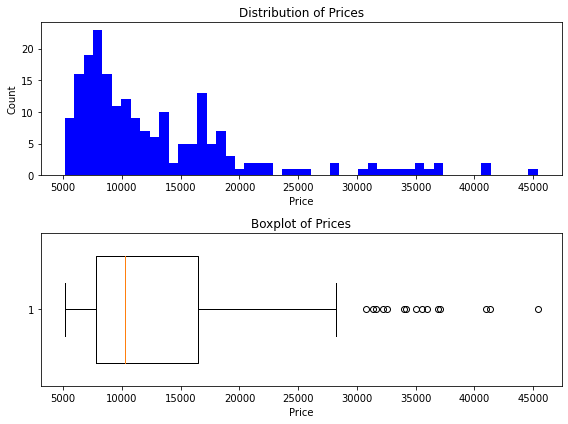

(0, 8000]           61
(8000, 16000]       89
(16000, 24000]      36
(24000, 32000]       7
(32000, 40000]       9
(40000, 48000]       3
(48000, 56000]       0
(56000, 64000]       0
(64000, 72000]       0
(72000, 80000]       0
(80000, 88000]       0
(88000, 96000]       0
(96000, 104000]      0
(104000, 112000]     0
(112000, 120000]     0
(120000, 128000]     0
(128000, 136000]     0
(136000, 144000]     0
(144000, 152000]     0
Name: price, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Plot the distribution of the 'price' column as a histogram
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.subplot(2, 1, 1)  # Create the first subplot
plt.hist(df['price'], bins=50, color='blue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')

# Plot a boxplot of the 'price' column
plt.subplot(2, 1, 2)  # Create the second subplot
plt.boxplot(df['price'], vert=False, widths=0.7)
plt.xlabel('Price')
plt.title('Boxplot of Prices')

plt.tight_layout()  # Automatically adjust subplot parameters

# Save the plot as a PDF file with a fit margin
plt.savefig('dist2.pdf', bbox_inches='tight')
plt.show()

# Define the bins for the price ranges
price_ranges = pd.cut(df['price'], bins=range(0, 160000, 8000))
# Calculate the count of prices in each range
price_counts = price_ranges.value_counts().sort_index()
# Display the price range counts
print(price_counts)

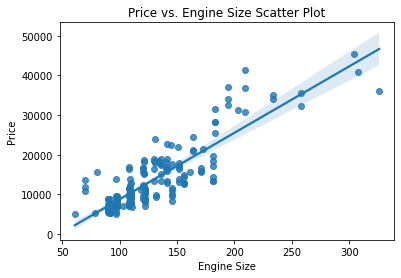

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/CarPrice_Assignment2.csv')

# Create a scatter plot of 'price' versus 'enginesize'
sns.regplot(x=df['enginesize'], y=df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price vs. Engine Size Scatter Plot')

# Save the plot as a PDF file with a fit margin
plt.savefig('pricevsenginesize1.pdf', bbox_inches='tight')

plt.show()

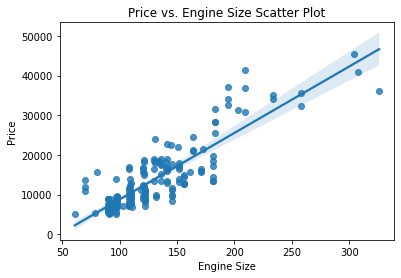

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Create a scatter plot of 'price' versus 'enginesize'
sns.regplot(x=df['enginesize'], y=df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price vs. Engine Size Scatter Plot')

# Save the plot as a PDF file with a fit margin
plt.savefig('pricevsenginesize2.pdf', bbox_inches='tight')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


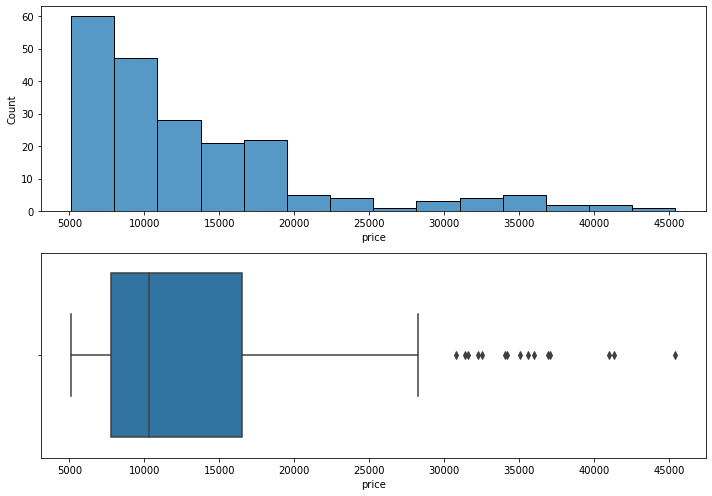

In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

In [ ]:
df_price_sqft= (df.loc[:,['price','enginesize']] - df.loc[:,['price','enginesize']].mean()) / df.loc[:,['price','enginesize']].std()
df_price_sqft

price  enginesize
0    0.027324    0.074267
1    0.403473    0.074267
2    0.403473    0.602571
3    0.084279   -0.430023
4    0.522389    0.218350
..        ...         ...
200  0.446659    0.338419
201  0.722042    0.338419
202  1.027468    1.106861
203  1.150765    0.434474
204  1.170167    0.338419

[205 rows x 2 columns]

<AxesSubplot:xlabel='enginesize', ylabel='price'>

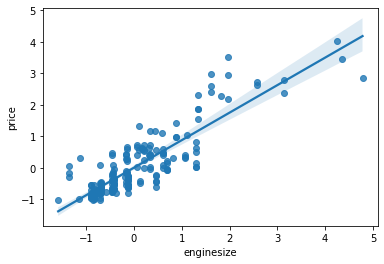

In [ ]:
sns.regplot(x= df_price_sqft['enginesize'],y= df_price_sqft['price'])

### Other Codes

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


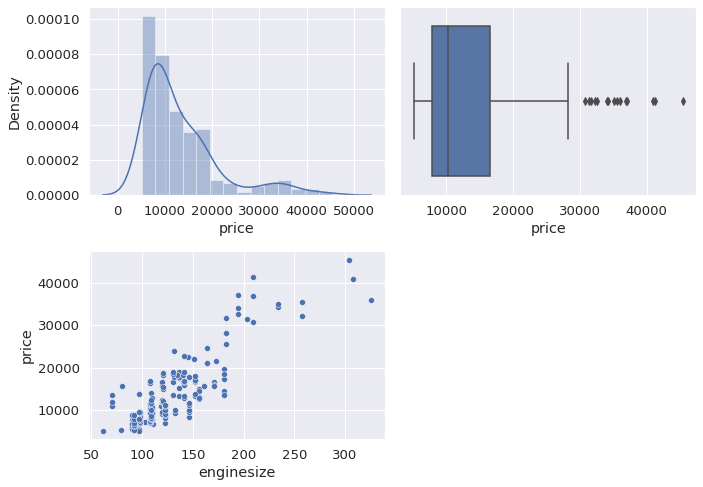

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,2,1)
sns.distplot(df['price'])
fig.add_subplot(2,2,2)
sns.boxplot(df['price'])
plt.tight_layout()
fig.add_subplot(2,2,3)
sns.scatterplot(df[df.columns[ii]],df['price'])
plt.tight_layout()
plt.show()

### E

In [ ]:
df['year']= df.date.apply(lambda x: x[:4])

In [ ]:
df['month']= df.date.apply(lambda x: x[4:6])

In [ ]:
df.drop('date', axis= 1, inplace= True)

In [ ]:
df.year= df.year.astype(int)
df.month= df.month.astype(int)

In [ ]:
df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 22 columns]

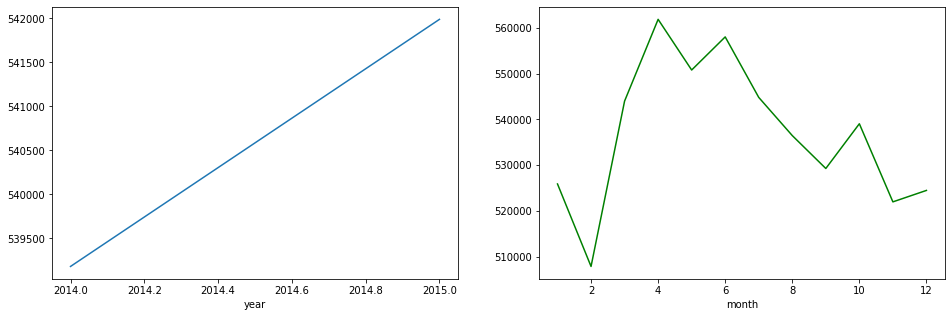

In [ ]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
df.groupby('year').mean()['price'].plot()

fig.add_subplot(1,2,2)
df.groupby('month').mean()['price'].plot(color= 'green')


## Section VII

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data from CSV file into a Pandas dataframe
data = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Split the data into train and test sets
train_data, test_data, train_label, test_label = train_test_split(data.drop(['price'], axis=1), data['price'], test_size=0.15, random_state=42)

# Save train and test data to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Save train and test labels to new CSV files
train_label.to_csv('train_label.csv', index=False)
test_label.to_csv('test_label.csv', index=False)

# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"test_label shape: {test_label.shape}")

train_data shape: (174, 74)
test_data shape: (31, 74)
train_label shape: (174,)
test_label shape: (31,)


### Other Codes

In [ ]:
#split train & test
data= np.array(df.iloc[:,1:])
np.random.shuffle(data)

In [ ]:
X= data[:,1:]
Y= data[:, 0]

In [ ]:
split= int(len(data)*0.8)
x_train, x_test= X[:split] , X[split:]
y_train, y_test= Y[:split] , Y[split:]

In [ ]:
y_test.shape

(41,)

In [ ]:
y_train= y_train.reshape((164,1))
y_test= y_test.reshape((41,1))

In [ ]:
print("shape of X_train : ", x_train.shape)
print("shape of y_train : ", y_train.shape)

print("shape of X_test : ", x_test.shape)
print("shape of y_test : ", y_test.shape)

shape of X_train :  (164, 22)
shape of y_train :  (164, 1)
shape of X_test :  (41, 22)
shape of y_test :  (41, 1)


## Section VIII

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# read csv file into a pandas dataframe
data = pd.read_csv('/content/CarPrice_Assignment4.csv')

# extract label column as y
y = data['price']

# extract all other columns as X
X = data.drop(columns=['price'])

# split data into train and test sets with a 85/15 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)

# save train and test data/label in new files
pd.DataFrame(X_train_scaled).to_csv('Xtrain.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('Xtest.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file
data = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Separate the label and data
label = df['price']
data = df.drop('price', axis=1)

# Remove the header from the variables
data = data.values
label = label.values

# Split the data into train/validation/test sets
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.15, random_state=42)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.15, random_state=42)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"val_data shape: {val_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"val_label shape: {val_label.shape}")
print(f"test_label shape: {test_label.shape}")

# Save the train/validation/test data/label to new files
pd.DataFrame(train_data).to_csv('/content/finaltrain_data.csv', index=False, header=False)
pd.DataFrame(val_data).to_csv('/content/finalval_data.csv', index=False, header=False)
pd.DataFrame(test_data).to_csv('/content/finaltest_data.csv', index=False, header=False)
pd.DataFrame(train_label).to_csv('/content/finaltrain_label.csv', index=False, header=False)
pd.DataFrame(val_label).to_csv('/content/finalval_label.csv', index=False, header=False)
pd.DataFrame(test_label).to_csv('/content/finaltest_label.csv', index=False, header=False)

train_data shape: (147, 23)
val_data shape: (27, 23)
test_data shape: (31, 23)
train_label shape: (147,)
val_label shape: (27,)
test_label shape: (31,)


# Part 2

## Section I

In [ ]:
# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Section II & III

Epoch [5/120], Train Loss: 0.1826, Val Loss: 0.1246, Train R2 score: -5.1341, Val R2 score: -4.9740
Epoch [10/120], Train Loss: 0.1529, Val Loss: 0.1014, Train R2 score: -4.1367, Val R2 score: -3.8611
Epoch [15/120], Train Loss: 0.1267, Val Loss: 0.0807, Train R2 score: -3.2548, Val R2 score: -2.8690
Epoch [20/120], Train Loss: 0.1028, Val Loss: 0.0621, Train R2 score: -2.4527, Val R2 score: -1.9784
Epoch [25/120], Train Loss: 0.0811, Val Loss: 0.0461, Train R2 score: -1.7253, Val R2 score: -1.2119
Epoch [30/120], Train Loss: 0.0624, Val Loss: 0.0336, Train R2 score: -1.0945, Val R2 score: -0.6121
Epoch [35/120], Train Loss: 0.0473, Val Loss: 0.0248, Train R2 score: -0.5894, Val R2 score: -0.1901
Epoch [40/120], Train Loss: 0.0370, Val Loss: 0.0194, Train R2 score: -0.2433, Val R2 score: 0.0704
Epoch [45/120], Train Loss: 0.0315, Val Loss: 0.0175, Train R2 score: -0.0586, Val R2 score: 0.1627
Epoch [50/120], Train Loss: 0.0294, Val Loss: 0.0175, Train R2 score: 0.0139, Val R2 score: 0.

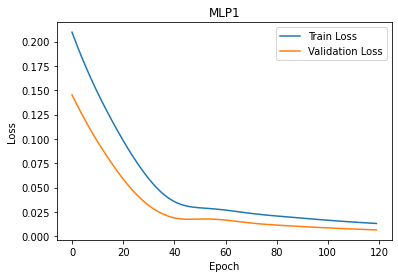

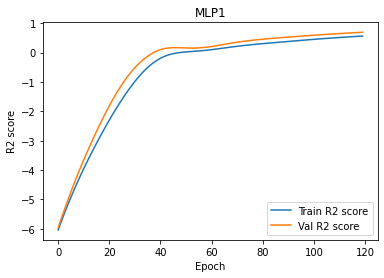

Epoch [5/120], Train Loss: 0.1068, Val Loss: 0.0747, Train R2 score: -2.5876, Val R2 score: -2.5819
Epoch [10/120], Train Loss: 0.0716, Val Loss: 0.0464, Train R2 score: -1.4039, Val R2 score: -1.2260
Epoch [15/120], Train Loss: 0.0459, Val Loss: 0.0282, Train R2 score: -0.5422, Val R2 score: -0.3542
Epoch [20/120], Train Loss: 0.0321, Val Loss: 0.0220, Train R2 score: -0.0787, Val R2 score: -0.0573
Epoch [25/120], Train Loss: 0.0295, Val Loss: 0.0239, Train R2 score: 0.0099, Val R2 score: -0.1473
Epoch [30/120], Train Loss: 0.0297, Val Loss: 0.0247, Train R2 score: 0.0038, Val R2 score: -0.1824
Epoch [35/120], Train Loss: 0.0273, Val Loss: 0.0215, Train R2 score: 0.0841, Val R2 score: -0.0312
Epoch [40/120], Train Loss: 0.0243, Val Loss: 0.0180, Train R2 score: 0.1846, Val R2 score: 0.1390
Epoch [45/120], Train Loss: 0.0224, Val Loss: 0.0158, Train R2 score: 0.2477, Val R2 score: 0.2427
Epoch [50/120], Train Loss: 0.0211, Val Loss: 0.0145, Train R2 score: 0.2897, Val R2 score: 0.3051


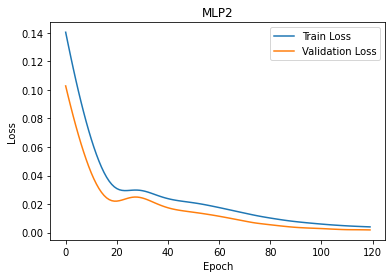

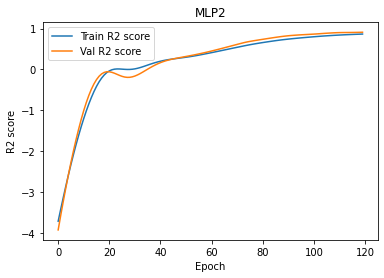

Epoch [5/120], Train Loss: 0.0636, Val Loss: 0.0358, Train R2 score: -1.1359, Val R2 score: -0.7151
Epoch [10/120], Train Loss: 0.0294, Val Loss: 0.0190, Train R2 score: 0.0112, Val R2 score: 0.0891
Epoch [15/120], Train Loss: 0.0270, Val Loss: 0.0272, Train R2 score: 0.0931, Val R2 score: -0.3023
Epoch [20/120], Train Loss: 0.0266, Val Loss: 0.0245, Train R2 score: 0.1052, Val R2 score: -0.1747
Epoch [25/120], Train Loss: 0.0191, Val Loss: 0.0158, Train R2 score: 0.3571, Val R2 score: 0.2407
Epoch [30/120], Train Loss: 0.0153, Val Loss: 0.0117, Train R2 score: 0.4867, Val R2 score: 0.4391
Epoch [35/120], Train Loss: 0.0117, Val Loss: 0.0087, Train R2 score: 0.6084, Val R2 score: 0.5812
Epoch [40/120], Train Loss: 0.0085, Val Loss: 0.0063, Train R2 score: 0.7134, Val R2 score: 0.7002
Epoch [45/120], Train Loss: 0.0070, Val Loss: 0.0044, Train R2 score: 0.7653, Val R2 score: 0.7894
Epoch [50/120], Train Loss: 0.0057, Val Loss: 0.0043, Train R2 score: 0.8091, Val R2 score: 0.7960
Epoch [

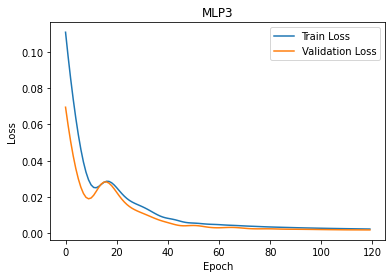

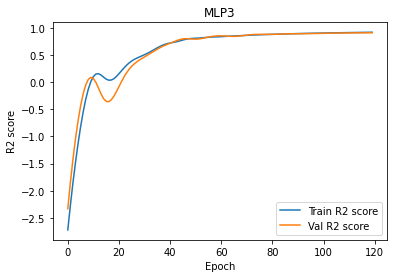

MLP1 Test Set Results:
Loss: 0.0157, R2 Score: 0.6370
MLP2 Test Set Results:
Loss: 0.0062, R2 Score: 0.8566
MLP3 Test Set Results:
Loss: 0.0045, R2 Score: 0.8952


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

## Section IV

### Diff Loss

Epoch [5/120], Train Loss: 0.0543, Val Loss: 0.0331, Train R2 score: -0.8224, Val R2 score: -0.5880
Epoch [10/120], Train Loss: 0.0388, Val Loss: 0.0245, Train R2 score: -0.3023, Val R2 score: -0.1747
Epoch [15/120], Train Loss: 0.0294, Val Loss: 0.0202, Train R2 score: 0.0109, Val R2 score: 0.0328
Epoch [20/120], Train Loss: 0.0246, Val Loss: 0.0180, Train R2 score: 0.1745, Val R2 score: 0.1348
Epoch [25/120], Train Loss: 0.0216, Val Loss: 0.0161, Train R2 score: 0.2745, Val R2 score: 0.2279
Epoch [30/120], Train Loss: 0.0187, Val Loss: 0.0134, Train R2 score: 0.3707, Val R2 score: 0.3580
Epoch [35/120], Train Loss: 0.0157, Val Loss: 0.0107, Train R2 score: 0.4716, Val R2 score: 0.4881
Epoch [40/120], Train Loss: 0.0133, Val Loss: 0.0087, Train R2 score: 0.5530, Val R2 score: 0.5829
Epoch [45/120], Train Loss: 0.0117, Val Loss: 0.0074, Train R2 score: 0.6072, Val R2 score: 0.6429
Epoch [50/120], Train Loss: 0.0104, Val Loss: 0.0065, Train R2 score: 0.6494, Val R2 score: 0.6880
Epoch [

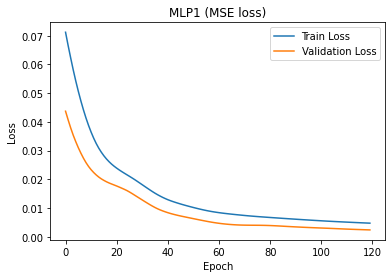

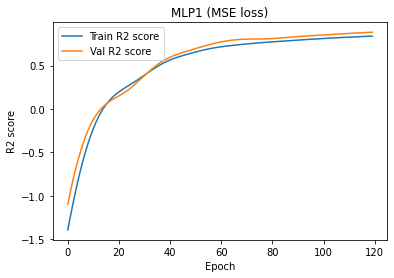

Epoch [5/120], Train Loss: 0.0689, Val Loss: 0.0422, Train R2 score: -1.3146, Val R2 score: -1.0246
Epoch [10/120], Train Loss: 0.0457, Val Loss: 0.0258, Train R2 score: -0.5362, Val R2 score: -0.2358
Epoch [15/120], Train Loss: 0.0318, Val Loss: 0.0183, Train R2 score: -0.0672, Val R2 score: 0.1217
Epoch [20/120], Train Loss: 0.0261, Val Loss: 0.0184, Train R2 score: 0.1236, Val R2 score: 0.1156
Epoch [25/120], Train Loss: 0.0256, Val Loss: 0.0212, Train R2 score: 0.1391, Val R2 score: -0.0172
Epoch [30/120], Train Loss: 0.0249, Val Loss: 0.0209, Train R2 score: 0.1622, Val R2 score: -0.0011
Epoch [35/120], Train Loss: 0.0222, Val Loss: 0.0176, Train R2 score: 0.2542, Val R2 score: 0.1542
Epoch [40/120], Train Loss: 0.0193, Val Loss: 0.0145, Train R2 score: 0.3522, Val R2 score: 0.3026
Epoch [45/120], Train Loss: 0.0168, Val Loss: 0.0123, Train R2 score: 0.4340, Val R2 score: 0.4106
Epoch [50/120], Train Loss: 0.0142, Val Loss: 0.0101, Train R2 score: 0.5217, Val R2 score: 0.5153
Epoc

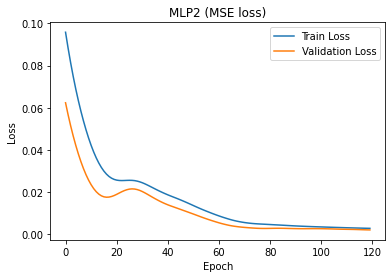

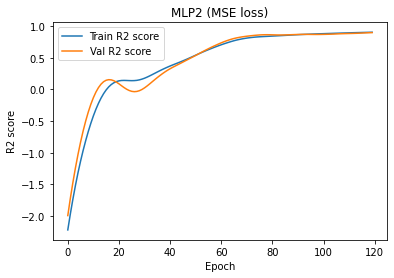

Epoch [5/120], Train Loss: 0.0792, Val Loss: 0.0472, Train R2 score: -1.6591, Val R2 score: -1.2615
Epoch [10/120], Train Loss: 0.0334, Val Loss: 0.0200, Train R2 score: -0.1230, Val R2 score: 0.0396
Epoch [15/120], Train Loss: 0.0272, Val Loss: 0.0266, Train R2 score: 0.0879, Val R2 score: -0.2769
Epoch [20/120], Train Loss: 0.0317, Val Loss: 0.0300, Train R2 score: -0.0645, Val R2 score: -0.4393
Epoch [25/120], Train Loss: 0.0245, Val Loss: 0.0208, Train R2 score: 0.1761, Val R2 score: 0.0010
Epoch [30/120], Train Loss: 0.0194, Val Loss: 0.0155, Train R2 score: 0.3495, Val R2 score: 0.2570
Epoch [35/120], Train Loss: 0.0160, Val Loss: 0.0128, Train R2 score: 0.4641, Val R2 score: 0.3884
Epoch [40/120], Train Loss: 0.0115, Val Loss: 0.0095, Train R2 score: 0.6142, Val R2 score: 0.5463
Epoch [45/120], Train Loss: 0.0085, Val Loss: 0.0067, Train R2 score: 0.7146, Val R2 score: 0.6785
Epoch [50/120], Train Loss: 0.0058, Val Loss: 0.0061, Train R2 score: 0.8046, Val R2 score: 0.7053
Epoch

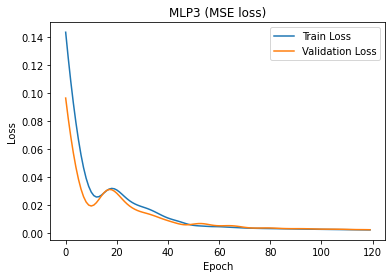

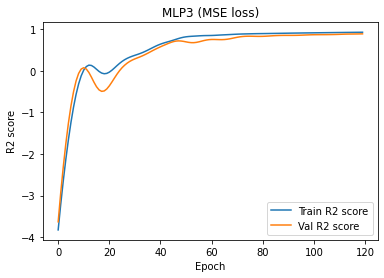

MLP1 Test Set Results:
Loss: 0.0074, R2 Score: 0.8281
MLP2 Test Set Results:
Loss: 0.0047, R2 Score: 0.8925
MLP3 Test Set Results:
Loss: 0.0035, R2 Score: 0.9183


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (MSE loss)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (MSE loss)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

Epoch [5/120], Train Loss: 0.1389, Val Loss: 0.1044, Train R2 score: -0.5184, Val R2 score: -0.1972
Epoch [10/120], Train Loss: 0.1255, Val Loss: 0.1002, Train R2 score: -0.2014, Val R2 score: 0.0362
Epoch [15/120], Train Loss: 0.1184, Val Loss: 0.0964, Train R2 score: -0.0224, Val R2 score: 0.1552
Epoch [20/120], Train Loss: 0.1116, Val Loss: 0.0929, Train R2 score: 0.1016, Val R2 score: 0.2434
Epoch [25/120], Train Loss: 0.1046, Val Loss: 0.0880, Train R2 score: 0.1941, Val R2 score: 0.3187
Epoch [30/120], Train Loss: 0.0975, Val Loss: 0.0810, Train R2 score: 0.2632, Val R2 score: 0.3829
Epoch [35/120], Train Loss: 0.0906, Val Loss: 0.0738, Train R2 score: 0.3173, Val R2 score: 0.4300
Epoch [40/120], Train Loss: 0.0839, Val Loss: 0.0676, Train R2 score: 0.3663, Val R2 score: 0.4653
Epoch [45/120], Train Loss: 0.0780, Val Loss: 0.0620, Train R2 score: 0.4271, Val R2 score: 0.5149
Epoch [50/120], Train Loss: 0.0718, Val Loss: 0.0565, Train R2 score: 0.5090, Val R2 score: 0.5966
Epoch [

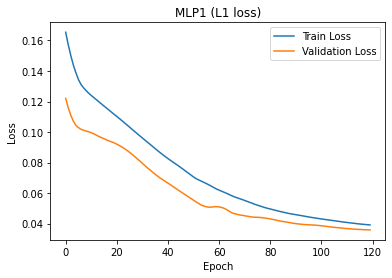

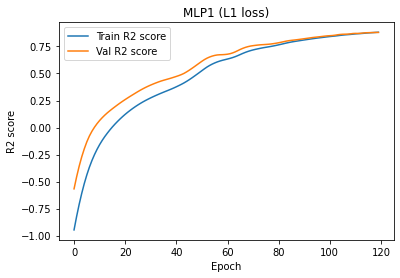

Epoch [5/120], Train Loss: 0.2577, Val Loss: 0.2025, Train R2 score: -2.4388, Val R2 score: -2.2325
Epoch [10/120], Train Loss: 0.1804, Val Loss: 0.1291, Train R2 score: -1.2738, Val R2 score: -0.9866
Epoch [15/120], Train Loss: 0.1436, Val Loss: 0.1158, Train R2 score: -0.5346, Val R2 score: -0.3751
Epoch [20/120], Train Loss: 0.1378, Val Loss: 0.1203, Train R2 score: -0.2253, Val R2 score: -0.2087
Epoch [25/120], Train Loss: 0.1334, Val Loss: 0.1201, Train R2 score: -0.0953, Val R2 score: -0.1098
Epoch [30/120], Train Loss: 0.1244, Val Loss: 0.1091, Train R2 score: 0.0061, Val R2 score: 0.0452
Epoch [35/120], Train Loss: 0.1128, Val Loss: 0.0940, Train R2 score: 0.0845, Val R2 score: 0.1918
Epoch [40/120], Train Loss: 0.1024, Val Loss: 0.0820, Train R2 score: 0.1284, Val R2 score: 0.2806
Epoch [45/120], Train Loss: 0.0937, Val Loss: 0.0718, Train R2 score: 0.1930, Val R2 score: 0.3842
Epoch [50/120], Train Loss: 0.0851, Val Loss: 0.0625, Train R2 score: 0.3025, Val R2 score: 0.5105
E

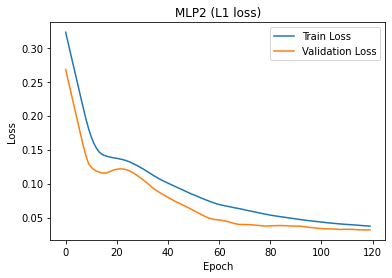

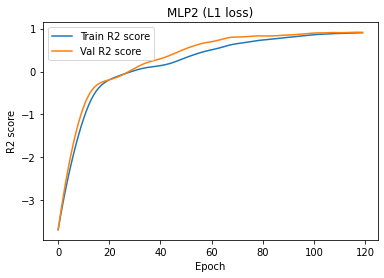

Epoch [5/120], Train Loss: 0.1972, Val Loss: 0.1406, Train R2 score: -1.3164, Val R2 score: -0.9109
Epoch [10/120], Train Loss: 0.1268, Val Loss: 0.0951, Train R2 score: -0.3169, Val R2 score: -0.0038
Epoch [15/120], Train Loss: 0.1252, Val Loss: 0.1138, Train R2 score: 0.0086, Val R2 score: 0.0704
Epoch [20/120], Train Loss: 0.1240, Val Loss: 0.1128, Train R2 score: 0.0723, Val R2 score: 0.1205
Epoch [25/120], Train Loss: 0.1132, Val Loss: 0.0941, Train R2 score: 0.1266, Val R2 score: 0.2607
Epoch [30/120], Train Loss: 0.1021, Val Loss: 0.0793, Train R2 score: 0.1218, Val R2 score: 0.3262
Epoch [35/120], Train Loss: 0.0917, Val Loss: 0.0672, Train R2 score: 0.1637, Val R2 score: 0.4287
Epoch [40/120], Train Loss: 0.0765, Val Loss: 0.0586, Train R2 score: 0.3551, Val R2 score: 0.6462
Epoch [45/120], Train Loss: 0.0707, Val Loss: 0.0549, Train R2 score: 0.4619, Val R2 score: 0.7098
Epoch [50/120], Train Loss: 0.0678, Val Loss: 0.0491, Train R2 score: 0.5456, Val R2 score: 0.7864
Epoch [

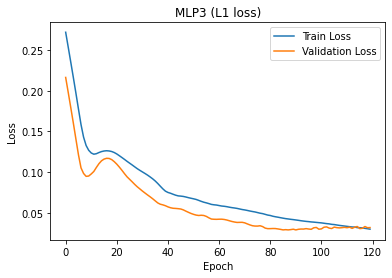

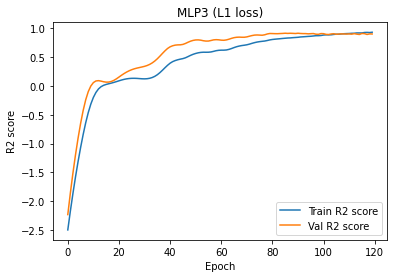

MLP1 Test Set Results:
Loss: 0.0492, R2 Score: 0.8302
MLP2 Test Set Results:
Loss: 0.0377, R2 Score: 0.9115
MLP3 Test Set Results:
Loss: 0.0388, R2 Score: 0.8944


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (L1 loss)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (L1 loss)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion1 = nn.L1Loss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.L1Loss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
criterion3 = nn.L1Loss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

### Diff Opt.

Epoch [5/120], Train Loss: 0.0700, Val Loss: 0.0413, Train R2 score: -1.3510, Val R2 score: -0.9823
Epoch [10/120], Train Loss: 0.0556, Val Loss: 0.0317, Train R2 score: -0.8664, Val R2 score: -0.5208
Epoch [15/120], Train Loss: 0.0454, Val Loss: 0.0258, Train R2 score: -0.5260, Val R2 score: -0.2391
Epoch [20/120], Train Loss: 0.0383, Val Loss: 0.0227, Train R2 score: -0.2876, Val R2 score: -0.0884
Epoch [25/120], Train Loss: 0.0337, Val Loss: 0.0216, Train R2 score: -0.1310, Val R2 score: -0.0341
Epoch [30/120], Train Loss: 0.0306, Val Loss: 0.0209, Train R2 score: -0.0287, Val R2 score: -0.0032
Epoch [35/120], Train Loss: 0.0282, Val Loss: 0.0199, Train R2 score: 0.0525, Val R2 score: 0.0455
Epoch [40/120], Train Loss: 0.0257, Val Loss: 0.0180, Train R2 score: 0.1352, Val R2 score: 0.1385
Epoch [45/120], Train Loss: 0.0230, Val Loss: 0.0154, Train R2 score: 0.2257, Val R2 score: 0.2633
Epoch [50/120], Train Loss: 0.0204, Val Loss: 0.0127, Train R2 score: 0.3151, Val R2 score: 0.3914

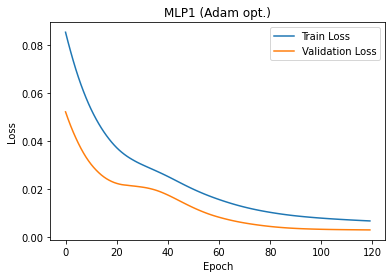

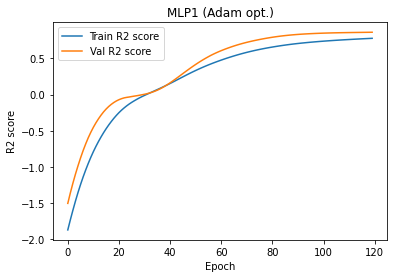

Epoch [5/120], Train Loss: 0.1286, Val Loss: 0.0951, Train R2 score: -3.3216, Val R2 score: -3.5583
Epoch [10/120], Train Loss: 0.0870, Val Loss: 0.0601, Train R2 score: -1.9231, Val R2 score: -1.8839
Epoch [15/120], Train Loss: 0.0559, Val Loss: 0.0361, Train R2 score: -0.8780, Val R2 score: -0.7331
Epoch [20/120], Train Loss: 0.0384, Val Loss: 0.0262, Train R2 score: -0.2916, Val R2 score: -0.2557
Epoch [25/120], Train Loss: 0.0348, Val Loss: 0.0279, Train R2 score: -0.1678, Val R2 score: -0.3397
Epoch [30/120], Train Loss: 0.0349, Val Loss: 0.0293, Train R2 score: -0.1707, Val R2 score: -0.4045
Epoch [35/120], Train Loss: 0.0312, Val Loss: 0.0254, Train R2 score: -0.0475, Val R2 score: -0.2191
Epoch [40/120], Train Loss: 0.0267, Val Loss: 0.0209, Train R2 score: 0.1027, Val R2 score: -0.0010
Epoch [45/120], Train Loss: 0.0237, Val Loss: 0.0180, Train R2 score: 0.2045, Val R2 score: 0.1357
Epoch [50/120], Train Loss: 0.0211, Val Loss: 0.0160, Train R2 score: 0.2903, Val R2 score: 0.2

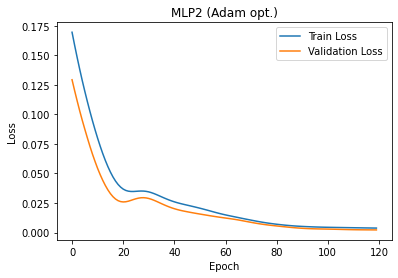

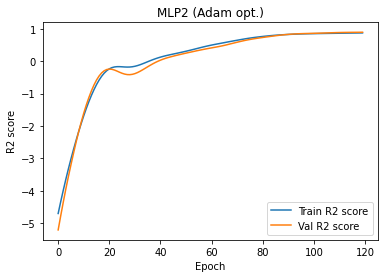

Epoch [5/120], Train Loss: 0.0370, Val Loss: 0.0212, Train R2 score: -0.2423, Val R2 score: -0.0177
Epoch [10/120], Train Loss: 0.0296, Val Loss: 0.0290, Train R2 score: 0.0058, Val R2 score: -0.3909
Epoch [15/120], Train Loss: 0.0274, Val Loss: 0.0234, Train R2 score: 0.0806, Val R2 score: -0.1241
Epoch [20/120], Train Loss: 0.0200, Val Loss: 0.0149, Train R2 score: 0.3294, Val R2 score: 0.2878
Epoch [25/120], Train Loss: 0.0163, Val Loss: 0.0115, Train R2 score: 0.4520, Val R2 score: 0.4482
Epoch [30/120], Train Loss: 0.0114, Val Loss: 0.0082, Train R2 score: 0.6164, Val R2 score: 0.6084
Epoch [35/120], Train Loss: 0.0086, Val Loss: 0.0053, Train R2 score: 0.7105, Val R2 score: 0.7472
Epoch [40/120], Train Loss: 0.0061, Val Loss: 0.0044, Train R2 score: 0.7939, Val R2 score: 0.7900
Epoch [45/120], Train Loss: 0.0055, Val Loss: 0.0037, Train R2 score: 0.8150, Val R2 score: 0.8207
Epoch [50/120], Train Loss: 0.0052, Val Loss: 0.0033, Train R2 score: 0.8253, Val R2 score: 0.8401
Epoch [

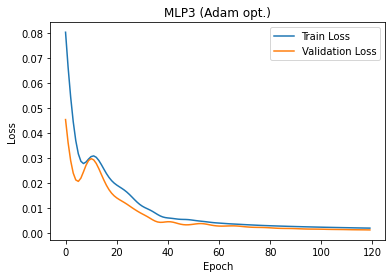

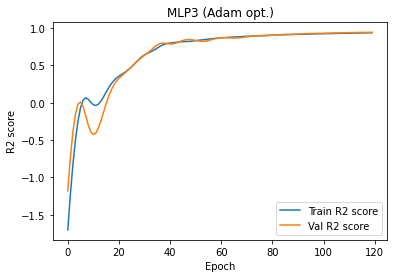

MLP1 Test Set Results:
Loss: 0.0075, R2 Score: 0.8257
MLP2 Test Set Results:
Loss: 0.0053, R2 Score: 0.8773
MLP3 Test Set Results:
Loss: 0.0045, R2 Score: 0.8969


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (Adam opt.)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (Adam opt.)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

Epoch [5/120], Train Loss: 0.0499, Val Loss: 0.0298, Train R2 score: -0.6754, Val R2 score: -0.4314
Epoch [10/120], Train Loss: 0.0443, Val Loss: 0.0265, Train R2 score: -0.4874, Val R2 score: -0.2728
Epoch [15/120], Train Loss: 0.0411, Val Loss: 0.0247, Train R2 score: -0.3797, Val R2 score: -0.1837
Epoch [20/120], Train Loss: 0.0389, Val Loss: 0.0235, Train R2 score: -0.3070, Val R2 score: -0.1258
Epoch [25/120], Train Loss: 0.0373, Val Loss: 0.0226, Train R2 score: -0.2520, Val R2 score: -0.0827
Epoch [30/120], Train Loss: 0.0359, Val Loss: 0.0219, Train R2 score: -0.2068, Val R2 score: -0.0479
Epoch [35/120], Train Loss: 0.0348, Val Loss: 0.0213, Train R2 score: -0.1678, Val R2 score: -0.0193
Epoch [40/120], Train Loss: 0.0337, Val Loss: 0.0207, Train R2 score: -0.1335, Val R2 score: 0.0059
Epoch [45/120], Train Loss: 0.0328, Val Loss: 0.0203, Train R2 score: -0.1031, Val R2 score: 0.0283
Epoch [50/120], Train Loss: 0.0320, Val Loss: 0.0198, Train R2 score: -0.0749, Val R2 score: 0

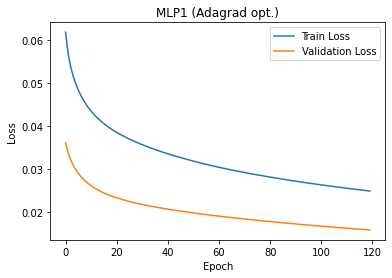

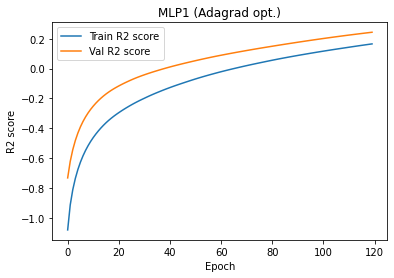

Epoch [5/120], Train Loss: 0.0811, Val Loss: 0.0576, Train R2 score: -1.7247, Val R2 score: -1.7609
Epoch [10/120], Train Loss: 0.0665, Val Loss: 0.0471, Train R2 score: -1.2339, Val R2 score: -1.2604
Epoch [15/120], Train Loss: 0.0570, Val Loss: 0.0403, Train R2 score: -0.9162, Val R2 score: -0.9304
Epoch [20/120], Train Loss: 0.0502, Val Loss: 0.0353, Train R2 score: -0.6857, Val R2 score: -0.6907
Epoch [25/120], Train Loss: 0.0449, Val Loss: 0.0314, Train R2 score: -0.5091, Val R2 score: -0.5074
Epoch [30/120], Train Loss: 0.0408, Val Loss: 0.0285, Train R2 score: -0.3705, Val R2 score: -0.3651
Epoch [35/120], Train Loss: 0.0375, Val Loss: 0.0261, Train R2 score: -0.2603, Val R2 score: -0.2531
Epoch [40/120], Train Loss: 0.0349, Val Loss: 0.0243, Train R2 score: -0.1712, Val R2 score: -0.1644
Epoch [45/120], Train Loss: 0.0327, Val Loss: 0.0228, Train R2 score: -0.0981, Val R2 score: -0.0932
Epoch [50/120], Train Loss: 0.0309, Val Loss: 0.0216, Train R2 score: -0.0376, Val R2 score:

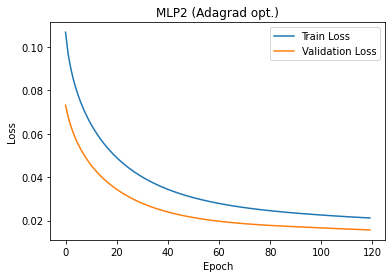

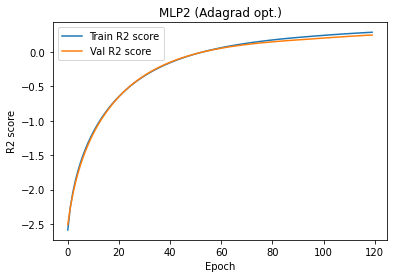

Epoch [5/120], Train Loss: 0.1029, Val Loss: 0.0687, Train R2 score: -2.4553, Val R2 score: -2.2954
Epoch [10/120], Train Loss: 0.0656, Val Loss: 0.0414, Train R2 score: -1.2048, Val R2 score: -0.9868
Epoch [15/120], Train Loss: 0.0451, Val Loss: 0.0271, Train R2 score: -0.5138, Val R2 score: -0.2989
Epoch [20/120], Train Loss: 0.0339, Val Loss: 0.0201, Train R2 score: -0.1377, Val R2 score: 0.0363
Epoch [25/120], Train Loss: 0.0281, Val Loss: 0.0170, Train R2 score: 0.0556, Val R2 score: 0.1838
Epoch [30/120], Train Loss: 0.0252, Val Loss: 0.0157, Train R2 score: 0.1524, Val R2 score: 0.2450
Epoch [35/120], Train Loss: 0.0236, Val Loss: 0.0151, Train R2 score: 0.2071, Val R2 score: 0.2763
Epoch [40/120], Train Loss: 0.0226, Val Loss: 0.0147, Train R2 score: 0.2420, Val R2 score: 0.2954
Epoch [45/120], Train Loss: 0.0218, Val Loss: 0.0144, Train R2 score: 0.2677, Val R2 score: 0.3117
Epoch [50/120], Train Loss: 0.0212, Val Loss: 0.0140, Train R2 score: 0.2891, Val R2 score: 0.3287
Epoc

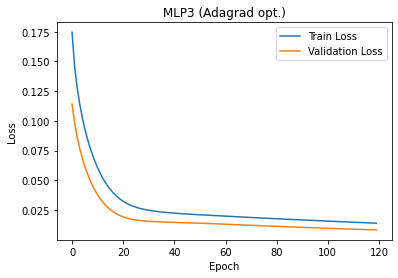

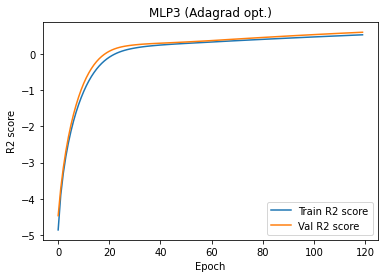

MLP1 Test Set Results:
Loss: 0.0306, R2 Score: 0.2941
MLP2 Test Set Results:
Loss: 0.0319, R2 Score: 0.2627
MLP3 Test Set Results:
Loss: 0.0197, R2 Score: 0.5445


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (Adagrad opt.)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (Adagrad opt.)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adagrad(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adagrad(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adagrad(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

Epoch [5/120], Train Loss: 0.0433, Val Loss: 0.0254, Train R2 score: -0.4561, Val R2 score: -0.2187
Epoch [10/120], Train Loss: 0.0246, Val Loss: 0.0166, Train R2 score: 0.1730, Val R2 score: 0.2038
Epoch [15/120], Train Loss: 0.0154, Val Loss: 0.0098, Train R2 score: 0.4822, Val R2 score: 0.5296
Epoch [20/120], Train Loss: 0.0099, Val Loss: 0.0063, Train R2 score: 0.6688, Val R2 score: 0.6989
Epoch [25/120], Train Loss: 0.0072, Val Loss: 0.0047, Train R2 score: 0.7571, Val R2 score: 0.7752
Epoch [30/120], Train Loss: 0.0059, Val Loss: 0.0038, Train R2 score: 0.8017, Val R2 score: 0.8161
Epoch [35/120], Train Loss: 0.0051, Val Loss: 0.0034, Train R2 score: 0.8273, Val R2 score: 0.8361
Epoch [40/120], Train Loss: 0.0046, Val Loss: 0.0031, Train R2 score: 0.8438, Val R2 score: 0.8503
Epoch [45/120], Train Loss: 0.0043, Val Loss: 0.0028, Train R2 score: 0.8554, Val R2 score: 0.8635
Epoch [50/120], Train Loss: 0.0040, Val Loss: 0.0027, Train R2 score: 0.8641, Val R2 score: 0.8724
Epoch [55

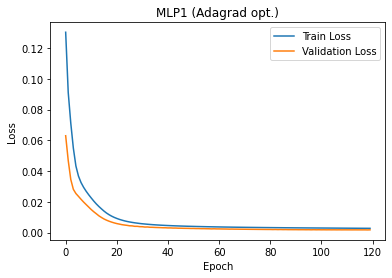

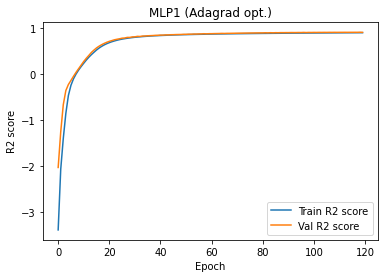

Epoch [5/120], Train Loss: 0.0232, Val Loss: 0.0164, Train R2 score: 0.2216, Val R2 score: 0.2149
Epoch [10/120], Train Loss: 0.0131, Val Loss: 0.0096, Train R2 score: 0.5613, Val R2 score: 0.5417
Epoch [15/120], Train Loss: 0.0078, Val Loss: 0.0060, Train R2 score: 0.7364, Val R2 score: 0.7139
Epoch [20/120], Train Loss: 0.0056, Val Loss: 0.0047, Train R2 score: 0.8108, Val R2 score: 0.7739
Epoch [25/120], Train Loss: 0.0065, Val Loss: 0.0033, Train R2 score: 0.7818, Val R2 score: 0.8431
Epoch [30/120], Train Loss: 0.0041, Val Loss: 0.0033, Train R2 score: 0.8611, Val R2 score: 0.8405
Epoch [35/120], Train Loss: 0.0036, Val Loss: 0.0026, Train R2 score: 0.8779, Val R2 score: 0.8757
Epoch [40/120], Train Loss: 0.0033, Val Loss: 0.0025, Train R2 score: 0.8882, Val R2 score: 0.8809
Epoch [45/120], Train Loss: 0.0031, Val Loss: 0.0022, Train R2 score: 0.8959, Val R2 score: 0.8961
Epoch [50/120], Train Loss: 0.0029, Val Loss: 0.0023, Train R2 score: 0.9019, Val R2 score: 0.8895
Epoch [55/1

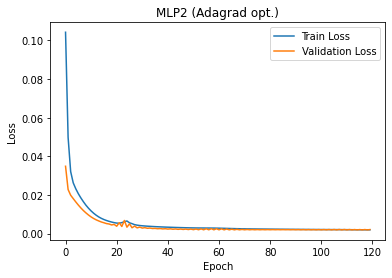

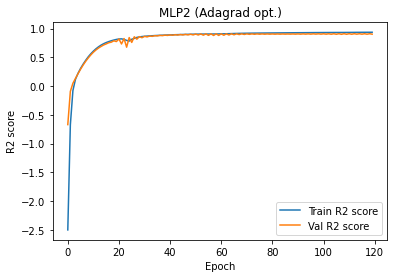

Epoch [5/120], Train Loss: 0.0180, Val Loss: 0.0107, Train R2 score: 0.3962, Val R2 score: 0.4883
Epoch [10/120], Train Loss: 0.0137, Val Loss: 0.0062, Train R2 score: 0.5388, Val R2 score: 0.7035
Epoch [15/120], Train Loss: 0.0067, Val Loss: 0.0059, Train R2 score: 0.7758, Val R2 score: 0.7166
Epoch [20/120], Train Loss: 0.0052, Val Loss: 0.0028, Train R2 score: 0.8253, Val R2 score: 0.8679
Epoch [25/120], Train Loss: 0.0044, Val Loss: 0.0041, Train R2 score: 0.8507, Val R2 score: 0.8048
Epoch [30/120], Train Loss: 0.0042, Val Loss: 0.0021, Train R2 score: 0.8601, Val R2 score: 0.8998
Epoch [35/120], Train Loss: 0.0037, Val Loss: 0.0035, Train R2 score: 0.8741, Val R2 score: 0.8337
Epoch [40/120], Train Loss: 0.0035, Val Loss: 0.0020, Train R2 score: 0.8825, Val R2 score: 0.9055
Epoch [45/120], Train Loss: 0.0032, Val Loss: 0.0029, Train R2 score: 0.8912, Val R2 score: 0.8614
Epoch [50/120], Train Loss: 0.0031, Val Loss: 0.0019, Train R2 score: 0.8964, Val R2 score: 0.9074
Epoch [55/1

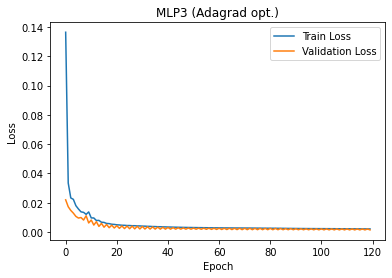

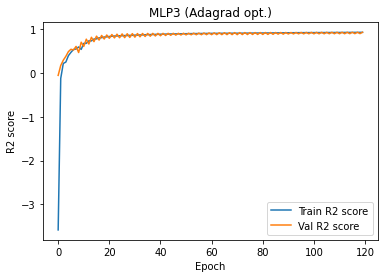

MLP1 Test Set Results:
Loss: 0.0065, R2 Score: 0.8509
MLP2 Test Set Results:
Loss: 0.0049, R2 Score: 0.8867
MLP3 Test Set Results:
Loss: 0.0035, R2 Score: 0.9187


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__ + ' (Adagrad opt.)')
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__ + ' (Adagrad opt.)')
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.01
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adagrad(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adagrad(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adagrad(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

## Section V

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file
data1 = pd.read_csv('/content/CarPrice_Assignment4.csv')

# Separate the label and data
label1 = data1['price']
data1 = data1.drop('price', axis=1)

# Remove the header from the variables
data1 = data1.values
label1 = label1.values

# Split the data into train/validation/test sets
train_data1, test_data1, train_label1, test_label1 = train_test_split(data1, label1, test_size=0.15, random_state=42)
train_data1, val_data1, train_label1, val_label1 = train_test_split(train_data1, train_label1, test_size=0.15, random_state=42)

scaler_y = MinMaxScaler().fit(test_label1.reshape(-1, 1))
scaler_y

MinMaxScaler()

Epoch [5/120], Train Loss: 0.1131, Val Loss: 0.0775, Train R2 score: -2.8004, Val R2 score: -2.7152
Epoch [10/120], Train Loss: 0.0945, Val Loss: 0.0630, Train R2 score: -2.1749, Val R2 score: -2.0221
Epoch [15/120], Train Loss: 0.0772, Val Loss: 0.0502, Train R2 score: -1.5949, Val R2 score: -1.4064
Epoch [20/120], Train Loss: 0.0616, Val Loss: 0.0393, Train R2 score: -1.0699, Val R2 score: -0.8844
Epoch [25/120], Train Loss: 0.0482, Val Loss: 0.0308, Train R2 score: -0.6186, Val R2 score: -0.4781
Epoch [30/120], Train Loss: 0.0386, Val Loss: 0.0249, Train R2 score: -0.2959, Val R2 score: -0.1948
Epoch [35/120], Train Loss: 0.0330, Val Loss: 0.0223, Train R2 score: -0.1085, Val R2 score: -0.0692
Epoch [40/120], Train Loss: 0.0301, Val Loss: 0.0214, Train R2 score: -0.0111, Val R2 score: -0.0250
Epoch [45/120], Train Loss: 0.0281, Val Loss: 0.0202, Train R2 score: 0.0563, Val R2 score: 0.0292
Epoch [50/120], Train Loss: 0.0258, Val Loss: 0.0183, Train R2 score: 0.1318, Val R2 score: 0.

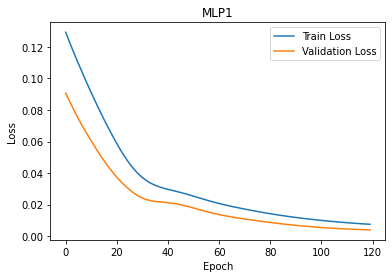

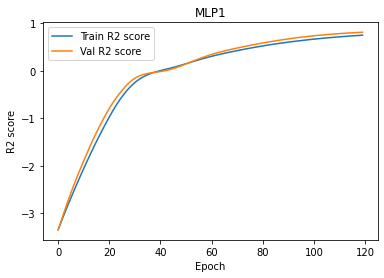

Epoch [5/120], Train Loss: 0.0627, Val Loss: 0.0387, Train R2 score: -1.1049, Val R2 score: -0.8557
Epoch [10/120], Train Loss: 0.0436, Val Loss: 0.0268, Train R2 score: -0.4645, Val R2 score: -0.2840
Epoch [15/120], Train Loss: 0.0331, Val Loss: 0.0227, Train R2 score: -0.1107, Val R2 score: -0.0903
Epoch [20/120], Train Loss: 0.0295, Val Loss: 0.0235, Train R2 score: 0.0103, Val R2 score: -0.1292
Epoch [25/120], Train Loss: 0.0283, Val Loss: 0.0240, Train R2 score: 0.0507, Val R2 score: -0.1500
Epoch [30/120], Train Loss: 0.0258, Val Loss: 0.0213, Train R2 score: 0.1347, Val R2 score: -0.0218
Epoch [35/120], Train Loss: 0.0224, Val Loss: 0.0176, Train R2 score: 0.2469, Val R2 score: 0.1561
Epoch [40/120], Train Loss: 0.0197, Val Loss: 0.0149, Train R2 score: 0.3382, Val R2 score: 0.2877
Epoch [45/120], Train Loss: 0.0173, Val Loss: 0.0127, Train R2 score: 0.4196, Val R2 score: 0.3918
Epoch [50/120], Train Loss: 0.0145, Val Loss: 0.0105, Train R2 score: 0.5141, Val R2 score: 0.4987
Ep

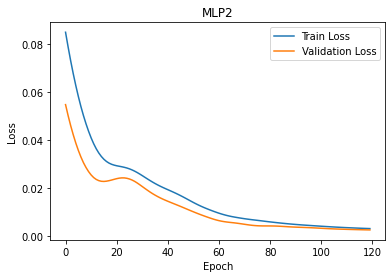

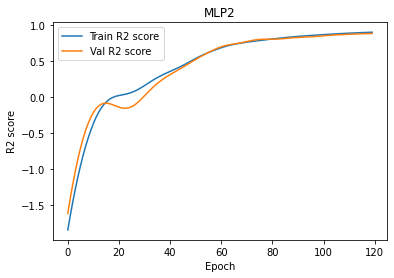

Epoch [5/120], Train Loss: 0.0976, Val Loss: 0.0622, Train R2 score: -2.2789, Val R2 score: -1.9819
Epoch [10/120], Train Loss: 0.0508, Val Loss: 0.0282, Train R2 score: -0.7081, Val R2 score: -0.3509
Epoch [15/120], Train Loss: 0.0275, Val Loss: 0.0182, Train R2 score: 0.0774, Val R2 score: 0.1268
Epoch [20/120], Train Loss: 0.0271, Val Loss: 0.0256, Train R2 score: 0.0891, Val R2 score: -0.2292
Epoch [25/120], Train Loss: 0.0273, Val Loss: 0.0233, Train R2 score: 0.0828, Val R2 score: -0.1186
Epoch [30/120], Train Loss: 0.0212, Val Loss: 0.0149, Train R2 score: 0.2871, Val R2 score: 0.2858
Epoch [35/120], Train Loss: 0.0182, Val Loss: 0.0106, Train R2 score: 0.3892, Val R2 score: 0.4914
Epoch [40/120], Train Loss: 0.0159, Val Loss: 0.0079, Train R2 score: 0.4667, Val R2 score: 0.6209
Epoch [45/120], Train Loss: 0.0131, Val Loss: 0.0055, Train R2 score: 0.5608, Val R2 score: 0.7346
Epoch [50/120], Train Loss: 0.0114, Val Loss: 0.0039, Train R2 score: 0.6159, Val R2 score: 0.8132
Epoch

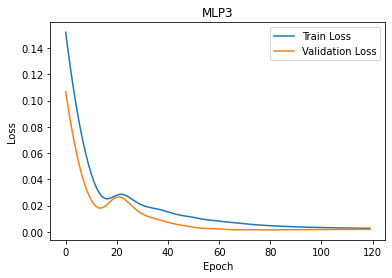

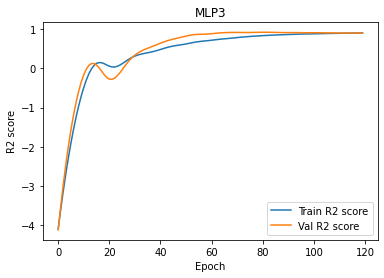

MLP1 Test Set Results:
Loss: 0.0111, R2 Score: 0.7434
MLP2 Test Set Results:
Loss: 0.0062, R2 Score: 0.8576
MLP3 Test Set Results:
Loss: 0.0029, R2 Score: 0.9332
Data 22:
MLP1 Predicted Value: 14151.8072, True Value: 11721.8557, Difference: 2429.9515
MLP2 Predicted Value: 9716.8267, True Value: 11721.8557, Difference: 2005.0289
MLP3 Predicted Value: 11012.7253, True Value: 11721.8557, Difference: 709.1303
Data 1:
MLP1 Predicted Value: 16950.5866, True Value: 19376.9675, Difference: 2426.3809
MLP2 Predicted Value: 17296.7602, True Value: 19376.9675, Difference: 2080.2072
MLP3 Predicted Value: 19032.5010, True Value: 19376.9675, Difference: 344.4664
Data 5:
MLP1 Predicted Value: 11692.4676, True Value: 11363.4019, Difference: 329.0656
MLP2 Predicted Value: 10818.7804, True Value: 11363.4019, Difference: 544.6215
MLP3 Predicted Value: 11029.7326, True Value: 11363.4019, Difference: 333.6693
Data 17:
MLP1 Predicted Value: 16690.7608, True Value: 15210.8052, Difference: 1479.9555
MLP2 Predi

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

import random

# Select 5 random indices from the test set
test_indices = random.sample(range(len(test_data)), 5)

# Evaluate the models on the selected test data
for i in test_indices:
    input_data = test_data[i]
    true_label = test_label[i]
    
    model1.load_state_dict(best_model1)
    model1.eval()
    with torch.no_grad():
        output1 = model1(input_data)
        unscaled_output1 = scaler_y.inverse_transform(output1.reshape(-1, 1))
        pred_label1 = unscaled_output1.squeeze().item()
        unscaled_true_label = scaler_y.inverse_transform(true_label.reshape(-1, 1))
        diff1 = abs(pred_label1 - unscaled_true_label.item())
    
    model2.load_state_dict(best_model2)
    model2.eval()
    with torch.no_grad():
        output2 = model2(input_data)
        unscaled_output2 = scaler_y.inverse_transform(output2.reshape(-1, 1))
        pred_label2 = unscaled_output2.squeeze().item()
        unscaled_true_label = scaler_y.inverse_transform(true_label.reshape(-1, 1))
        diff2 = abs(pred_label2 - unscaled_true_label.item())
    
    model3.load_state_dict(best_model3)
    model3.eval()
    with torch.no_grad():
        output3 = model3(input_data)
        unscaled_output3 = scaler_y.inverse_transform(output3.reshape(-1, 1))
        pred_label3 = unscaled_output3.squeeze().item()
        diff3 = abs(pred_label3 - unscaled_true_label.item())
    
    # Print the predicted and true values, and their differences
    print(f"Data {i}:")
    print("MLP1 Predicted Value: {:.4f}, True Value: {:.4f}, Difference: {:.4f}".format(pred_label1, unscaled_true_label.item(), diff1))
    print("MLP2 Predicted Value: {:.4f}, True Value: {:.4f}, Difference: {:.4f}".format(pred_label2, unscaled_true_label.item(), diff2))
    print("MLP3 Predicted Value: {:.4f}, True Value: {:.4f}, Difference: {:.4f}".format(pred_label3, unscaled_true_label.item(), diff3))

Epoch [5/120], Train Loss: 0.3051, Val Loss: 0.2572, Train R2 score: -9.2483, Val R2 score: -11.3333
Epoch [10/120], Train Loss: 0.2676, Val Loss: 0.2226, Train R2 score: -7.9881, Val R2 score: -9.6753
Epoch [15/120], Train Loss: 0.2311, Val Loss: 0.1892, Train R2 score: -6.7631, Val R2 score: -8.0726
Epoch [20/120], Train Loss: 0.1962, Val Loss: 0.1573, Train R2 score: -5.5916, Val R2 score: -6.5441
Epoch [25/120], Train Loss: 0.1634, Val Loss: 0.1284, Train R2 score: -4.4893, Val R2 score: -5.1587
Epoch [30/120], Train Loss: 0.1331, Val Loss: 0.1027, Train R2 score: -3.4713, Val R2 score: -3.9248
Epoch [35/120], Train Loss: 0.1061, Val Loss: 0.0802, Train R2 score: -2.5655, Val R2 score: -2.8464
Epoch [40/120], Train Loss: 0.0826, Val Loss: 0.0615, Train R2 score: -1.7759, Val R2 score: -1.9473
Epoch [45/120], Train Loss: 0.0634, Val Loss: 0.0472, Train R2 score: -1.1307, Val R2 score: -1.2631
Epoch [50/120], Train Loss: 0.0491, Val Loss: 0.0374, Train R2 score: -0.6499, Val R2 score

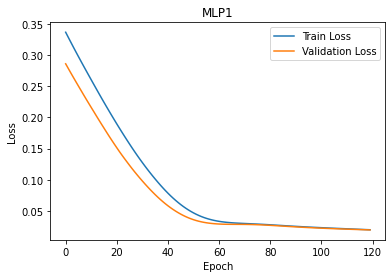

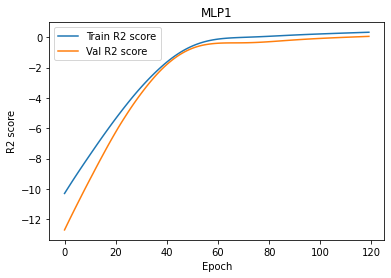

Epoch [5/120], Train Loss: 0.0763, Val Loss: 0.0434, Train R2 score: -1.5636, Val R2 score: -1.0828
Epoch [10/120], Train Loss: 0.0453, Val Loss: 0.0242, Train R2 score: -0.5214, Val R2 score: -0.1593
Epoch [15/120], Train Loss: 0.0292, Val Loss: 0.0184, Train R2 score: 0.0191, Val R2 score: 0.1190
Epoch [20/120], Train Loss: 0.0242, Val Loss: 0.0200, Train R2 score: 0.1871, Val R2 score: 0.0420
Epoch [25/120], Train Loss: 0.0231, Val Loss: 0.0207, Train R2 score: 0.2245, Val R2 score: 0.0082
Epoch [30/120], Train Loss: 0.0211, Val Loss: 0.0181, Train R2 score: 0.2916, Val R2 score: 0.1324
Epoch [35/120], Train Loss: 0.0184, Val Loss: 0.0146, Train R2 score: 0.3803, Val R2 score: 0.2998
Epoch [40/120], Train Loss: 0.0164, Val Loss: 0.0119, Train R2 score: 0.4478, Val R2 score: 0.4284
Epoch [45/120], Train Loss: 0.0150, Val Loss: 0.0101, Train R2 score: 0.4945, Val R2 score: 0.5157
Epoch [50/120], Train Loss: 0.0137, Val Loss: 0.0086, Train R2 score: 0.5394, Val R2 score: 0.5859
Epoch [

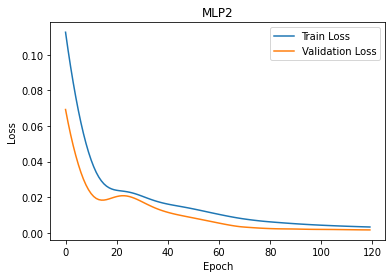

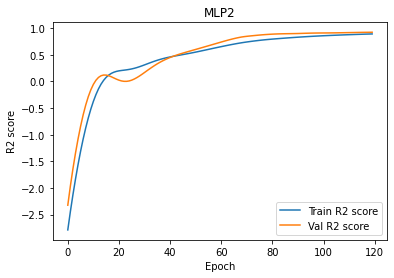

Epoch [5/120], Train Loss: 0.0900, Val Loss: 0.0553, Train R2 score: -2.0225, Val R2 score: -1.6536
Epoch [10/120], Train Loss: 0.0437, Val Loss: 0.0239, Train R2 score: -0.4686, Val R2 score: -0.1481
Epoch [15/120], Train Loss: 0.0273, Val Loss: 0.0228, Train R2 score: 0.0821, Val R2 score: -0.0910
Epoch [20/120], Train Loss: 0.0319, Val Loss: 0.0304, Train R2 score: -0.0708, Val R2 score: -0.4575
Epoch [25/120], Train Loss: 0.0276, Val Loss: 0.0233, Train R2 score: 0.0713, Val R2 score: -0.1150
Epoch [30/120], Train Loss: 0.0229, Val Loss: 0.0172, Train R2 score: 0.2301, Val R2 score: 0.1734
Epoch [35/120], Train Loss: 0.0213, Val Loss: 0.0152, Train R2 score: 0.2833, Val R2 score: 0.2696
Epoch [40/120], Train Loss: 0.0185, Val Loss: 0.0131, Train R2 score: 0.3791, Val R2 score: 0.3715
Epoch [45/120], Train Loss: 0.0148, Val Loss: 0.0105, Train R2 score: 0.5017, Val R2 score: 0.4952
Epoch [50/120], Train Loss: 0.0124, Val Loss: 0.0081, Train R2 score: 0.5837, Val R2 score: 0.6121
Epo

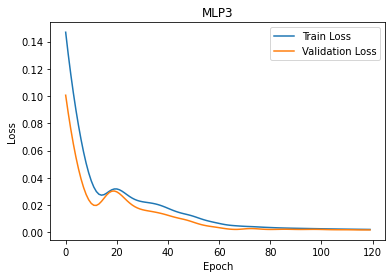

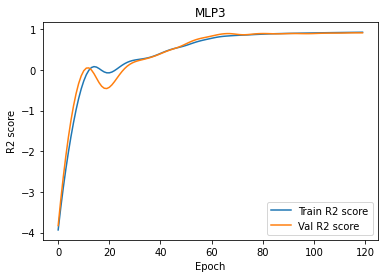

MLP1 Test Set Results:
Loss: 0.0264, R2 Score: 0.3906
MLP2 Test Set Results:
Loss: 0.0049, R2 Score: 0.8869
MLP3 Test Set Results:
Loss: 0.0051, R2 Score: 0.8833
Data 20:
MLP1 Predicted Value: 0.2876, True Value: 0.1871, Difference: 0.1005
MLP2 Predicted Value: 0.2281, True Value: 0.1871, Difference: 0.0410
MLP3 Predicted Value: 0.2144, True Value: 0.1871, Difference: 0.0273
Data 2:
MLP1 Predicted Value: 0.2800, True Value: 0.2103, Difference: 0.0696
MLP2 Predicted Value: 0.2056, True Value: 0.2103, Difference: 0.0047
MLP3 Predicted Value: 0.1994, True Value: 0.2103, Difference: 0.0109
Data 4:
MLP1 Predicted Value: 0.5539, True Value: 0.6222, Difference: 0.0683
MLP2 Predicted Value: 0.5799, True Value: 0.6222, Difference: 0.0423
MLP3 Predicted Value: 0.5813, True Value: 0.6222, Difference: 0.0409
Data 23:
MLP1 Predicted Value: 0.1077, True Value: 0.1427, Difference: 0.0351
MLP2 Predicted Value: 0.0998, True Value: 0.1427, Difference: 0.0429
MLP3 Predicted Value: 0.1389, True Value: 0.1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the MLP models
class MLP1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define the training function
def train(model, optimizer, criterion, train_data, train_label, val_data, val_label, num_epochs=1000):
    train_loss_list = []
    val_loss_list = []
    r2score_list = []
    train_r2score_list = []
    best_model = None
    best_r2score = -1
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_data)
        train_loss = criterion(train_output.squeeze(), train_label)
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        train_r2score = r2_score(train_label, train_output.squeeze().detach().numpy())
        train_r2score_list.append(train_r2score)
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_output = model(val_data)
            val_loss = criterion(val_output.squeeze(), val_label)
            val_loss_list.append(val_loss.item())
            r2score = r2_score(val_label, val_output.squeeze().detach().numpy())
            r2score_list.append(r2score)
            if r2score > best_r2score:
                best_r2score = r2score
                best_model = model.state_dict()
        
        # Print loss and R2 score every 100 epochs
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train R2 score: {train_r2score:.4f}, Val R2 score: {r2score:.4f}")
    
    # Plot loss curve and save as pdf
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_loss.pdf")
    plt.show()
    
    # Plot R2 score curve and save as pdf
    plt.plot(train_r2score_list, label='Train R2 score')
    plt.plot(r2score_list, label='Val R2 score')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(type(model).__name__)
    plt.savefig(f"{type(model).__name__}_r2score.pdf")
    plt.show()

    # Return the best model based on the validation R2 score
    return best_model
    
# Define the data and labels
train_data = torch.Tensor(train_data)
train_label = torch.Tensor(train_label)
val_data = torch.Tensor(val_data)
val_label = torch.Tensor(val_label)
test_data = torch.Tensor(test_data)
test_label = torch.Tensor(test_label)

# Define the hyperparameters
input_dim = 23
output_dim = 1
hidden_dim1 = 16
hidden_dim2 = 64
hidden_dim3 = 128
learning_rate = 0.001
num_epochs = 120

# Train the models
model1 = MLP1(input_dim, hidden_dim1, output_dim)
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
criterion1 = nn.MSELoss()
best_model1 = train(model1, optimizer1, criterion1, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model2 = MLP2(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()
best_model2 = train(model2, optimizer2, criterion2, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

model3 = MLP3(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()
best_model3 = train(model3, optimizer3, criterion3, train_data, train_label, val_data, val_label, num_epochs=num_epochs)

# Evaluate the models on the test set
model1.load_state_dict(best_model1)
model1.eval()
with torch.no_grad():
    test_output1 = model1(test_data)
    test_loss1 = criterion1(test_output1.squeeze(), test_label)
    test_r2score1 = r2_score(test_label, test_output1.squeeze().detach().numpy())

model2.load_state_dict(best_model2)
model2.eval()
with torch.no_grad():
    test_output2 = model2(test_data)
    test_loss2 = criterion2(test_output2.squeeze(), test_label)
    test_r2score2 = r2_score(test_label, test_output2.squeeze().detach().numpy())

model3.load_state_dict(best_model3)
model3.eval()
with torch.no_grad():
    test_output3 = model3(test_data)
    test_loss3 = criterion3(test_output3.squeeze(), test_label)
    test_r2score3 = r2_score(test_label, test_output3.squeeze().detach().numpy())

# Print the test set results
print("MLP1 Test Set Results:")
print(f"Loss: {test_loss1:.4f}, R2 Score: {test_r2score1:.4f}")

print("MLP2 Test Set Results:")
print(f"Loss: {test_loss2:.4f}, R2 Score: {test_r2score2:.4f}")

print("MLP3 Test Set Results:")
print(f"Loss: {test_loss3:.4f}, R2 Score: {test_r2score3:.4f}")

import random

# Select 5 random indices from the test set
test_indices = random.sample(range(len(test_data)), 5)

# Evaluate the models on the selected test data
for i in test_indices:
    input_data = test_data[i]
    true_label = test_label[i]
    
    model1.load_state_dict(best_model1)
    model1.eval()
    with torch.no_grad():
        output1 = model1(input_data)
        pred_label1 = output1.squeeze().item()
        diff1 = abs(pred_label1 - true_label.item())
    
    model2.load_state_dict(best_model2)
    model2.eval()
    with torch.no_grad():
        output2 = model2(input_data)
        pred_label2 = output2.squeeze().item()
        diff2 = abs(pred_label2 - true_label.item())
    
    model3.load_state_dict(best_model3)
    model3.eval()
    with torch.no_grad():
        output3 = model3(input_data)
        pred_label3 = output3.squeeze().item()
        diff3 = abs(pred_label3 - true_label.item())
    
    # Print the predicted and true values, and their differences
    print(f"Data {i}:")
    print("MLP1 Predicted Value: {:.4f}, True Value: {:.4f}, Difference: {:.4f}".format(pred_label1, true_label.item(), diff1))
    print("MLP2 Predicted Value: {:.4f}, True Value: {:.4f}, Difference: {:.4f}".format(pred_label2, true_label.item(), diff2))
    print("MLP3 Predicted Value: {:.4f}, True Value: {:.4f}, Difference: {:.4f}".format(pred_label3, true_label.item(), diff3))
